In [1]:
using BenchmarkTools
using Jems.Chem
using Jems.Constants
using Jems.EOS
using Jems.Opacity
using Jems.Evolution

In [2]:
nvars = 6
nspecies = 2
varnames = [:lnP,:lnT,:lnr,:lum,:H1, :He4]
structure_equations=[Evolution.equationHSE, Evolution.equationT,
                        Evolution.equationContinuity, Evolution.equationLuminosity,
                        Evolution.equationH1, Evolution.equationHe4]
nz = 1000
eos = EOS.IdealEOS(false)
opacity = Opacity.SimpleElectronScatteringOpacity()
sm = StellarModel(varnames, structure_equations, nvars, nspecies, nz, eos, opacity);

In [3]:
Evolution.n1_polytrope_initial_condition(sm, MSUN, 100*RSUN; initial_dt=10*SECYEAR)

Evolution.set_end_step_info!(sm)
Evolution.cycle_step_info!(sm)
Evolution.set_start_step_info!(sm)

Evolution.eval_jacobian!(sm)
Evolution.eval_eqs!(sm)

In [4]:
using LinearSolve
@benchmark begin
    $sm.linear_solver.A = $sm.jacobian
    $sm.linear_solver.b = $sm.eqs
    corr =solve($sm.linear_solver)
end

BenchmarkTools.Trial: 775 samples with 1 evaluation.
 Range (min … max):  5.439 ms …   8.975 ms  ┊ GC (min … max): 0.00% … 15.19%
 Time  (median):     6.216 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   6.435 ms ± 695.652 μs  ┊ GC (mean ± σ):  3.45% ±  5.93%

       ▅█▇█▂▄▆▅▅▅▇▄▁▂  ▂▁▂▁                                    
  ▂▃▂▄████████████████▇████▆▅▃▃▃▃▃▃▄▅▁▃▅▄▃▃▃▃▃▄▃▄▃▃▄▂▄▂▃▄▂▂▂▃ ▄
  5.44 ms         Histogram: frequency by time        8.31 ms <

 Memory estimate: 8.73 MiB, allocs estimate: 41.

In [5]:
@benchmark Evolution.eval_jacobian_row!(sm,2)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  14.207 μs …  2.390 ms  ┊ GC (min … max): 0.00% … 95.97%
 Time  (median):     15.717 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   19.437 μs ± 60.844 μs  ┊ GC (mean ± σ):  9.02% ±  2.87%

   ▅▇█▇▆▃▂       ▁▁▁        ▁▁▂▂▂▁▁▁▁▁                        ▂
  ████████▇▇▇▆▇█████▇██▇███████████████▇▇▇▆▆▆▅▆▄▄▅▅▆▆▆▆▇▆▆▆▅▆ █
  14.2 μs      Histogram: log(frequency) by time      36.8 μs <

 Memory estimate: 42.34 KiB, allocs estimate: 417.

In [6]:
@benchmark Evolution.eval_jacobian!(sm)

BenchmarkTools.Trial: 415 samples with 1 evaluation.
 Range (min … max):   3.772 ms … 53.311 ms  ┊ GC (min … max):  0.00% … 87.02%
 Time  (median):      7.403 ms              ┊ GC (median):     0.00%
 Time  (mean ± σ):   12.027 ms ± 13.501 ms  ┊ GC (mean ± σ):  42.58% ± 28.70%

   ▁▃▄█                                                        
  █████▇▆▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▆▆▇▇▆▅▄▆▆▆▆█ ▆
  3.77 ms      Histogram: log(frequency) by time      52.6 ms <

 Memory estimate: 41.93 MiB, allocs estimate: 456470.

In [9]:
Evolution.set_options!(sm.opt, "example_options.toml")
rm(sm.opt.io.hdf5_history_filename, force=true)
rm(sm.opt.io.hdf5_profile_filename, force=true)
Evolution.n1_polytrope_initial_condition(sm, MSUN, 100*RSUN, initial_dt=10*SECYEAR)

Evolution.do_evolution_loop(sm)

(i, maximum(corr), real_max_corr, maximum(sm.eqs)) = (50, 3.0, 472.81312749389855, 118.32015283329133)


(i, maximum(corr), real_max_corr, maximum(sm.eqs)) = (100, 3.0, 346.6859424777269, 82.54834547648488)


(i, maximum(corr), real_max_corr, maximum(sm.eqs)) = (150, 3.0, 212.9630117656746, 48.49529300851418)


(i, maximum(corr), real_max_corr, maximum(sm.eqs)) = (200, 3.0, 71.18981009220674, 15.778522910728498)


Found first model
(sm.model_number, i, real_max_corr, maximum(sm.eqs), dt_next / SECYEAR, sm.time / SECYEAR) = (0, 226, 2.890659056848877e-14, 2.942215360235423e-10, 10.0, 0.0)


(sm.model_number, i, real_max_corr, maximum(sm.eqs), dt_next / SECYEAR, sm.time / SECYEAR) = (100, 3, 2.640033198467342e-11, 2.4850285242905557e-6, 0.13841136812499766, 16.969363494003613)


(sm.model_number, i, real_max_corr, maximum(sm.eqs), dt_next / SECYEAR, sm.time / SECYEAR) = (200, 3, 8.677711427348798e-11, 1.5123765528812783e-6, 0.98158950487887, 59.47280366904773)


(sm.model_number, i, real_max_corr, maximum(sm.eqs), dt_next / SECYEAR, sm.time / SECYEAR) = (300, 4, 1.2895645746918926e-14, 1.2846568253621626e-10, 11.087312788325406, 428.74951142443643)


(sm.model_number, i, real_max_corr, maximum(sm.eqs), dt_next / SECYEAR, sm.time / SECYEAR) = (400, 4, 3.757388399914547e-14, 9.59931134580927e-10, 195.4335025845918, 11251.518397250049)


(sm.model_number, i, real_max_corr, maximum(sm.eqs), dt_next / SECYEAR, sm.time / SECYEAR) = (500, 4, 1.6121526614788606e-14, 1.4446948082280642e-9, 283.55373040999234, 33981.06912032748)


(sm.model_number, i, real_max_corr, maximum(sm.eqs), dt_next / SECYEAR, sm.time / SECYEAR) = (600, 4, 2.012769856549968e-14, 8.342216917256451e-10, 495.00576586981555, 71577.1784062089)


(sm.model_number, i, real_max_corr, maximum(sm.eqs), dt_next / SECYEAR, sm.time / SECYEAR) = (700, 4, 6.228890686149296e-14, 9.630570230179103e-10, 974.9708030301285, 141032.04201216347)


(sm.model_number, i, real_max_corr, maximum(sm.eqs), dt_next / SECYEAR, sm.time / SECYEAR) = (800, 4, 3.0576728292378796e-12, 1.8281503533223997e-9, 3140.945731321282, 309480.00923484564)


(sm.model_number, i, real_max_corr, maximum(sm.eqs), dt_next / SECYEAR, sm.time / SECYEAR) = (900, 4, 7.611349044947178e-11, 3.111510456218779e-9, 6.953838895207252e7, 3.9002807962536564e9)


Reached maximum central temperature


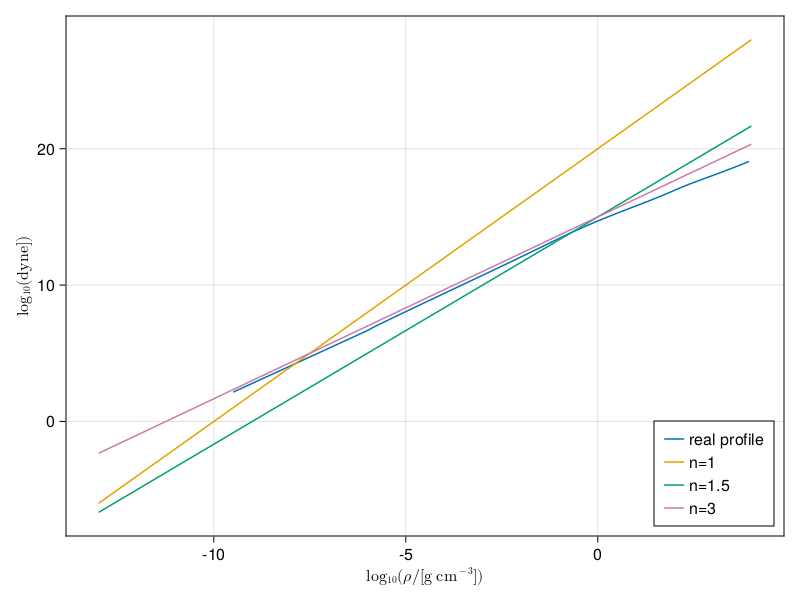

In [12]:
# Compare ρ-T profile with different polytropes

profile_names = Evolution.get_profile_names_from_hdf5("profiles.hdf5")

using CairoMakie, LaTeXStrings

f = Figure()
ax = Axis(f[1,1], xlabel=L"\log_{10}(\mathrm{\rho/[g\;cm^{-3}]})", ylabel=L"\log_{10}(\mathrm{dyne]})")

pname = Observable(profile_names[1])

profile = @lift(Evolution.get_profile_dataframe_from_hdf5("profiles.hdf5", $pname))
log10_ρ = @lift($profile[!,"log10_ρ"])
log10_P = @lift($profile[!,"log10_P"])

profile_line = lines!(ax, log10_ρ, log10_P, label="real profile")
#compare profile against some polytropes
xvals = LinRange(-13,4,100)
lines!(ax,xvals,(1+1/1) .* xvals .+ 20, label="n=1")
lines!(ax,xvals,(1+1/(1.5)) .* xvals .+ 15, label="n=1.5")
lines!(ax,xvals,(1+1/3) .* xvals .+ 15, label="n=3")
axislegend(ax, position=:rb)

record(f, "rho_P_evolution.mp4", profile_names[1:end];
        framerate = 60) do profile_name
    pname[] = profile_name
end

f

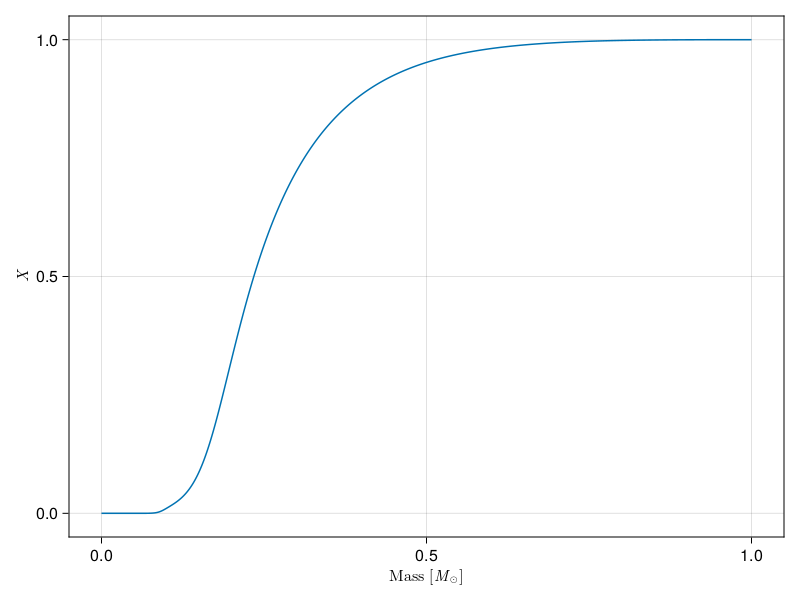

In [13]:
# Check evolution of abundance

profile_names = Evolution.get_profile_names_from_hdf5("profiles.hdf5")

using CairoMakie

f = Figure()
ax = Axis(f[1,1], xlabel=L"\mathrm{Mass}\;[M_\odot]", ylabel=L"X")

pname = Observable(profile_names[1])

profile = @lift(Evolution.get_profile_dataframe_from_hdf5("profiles.hdf5", $pname))
mass = @lift($profile[!,"mass"])
X = @lift($profile[!,"X"])

profile_line = lines!(ax, mass, X, label="real profile")

record(f, "X_evolution.mp4", profile_names[1:end];
        framerate = 60) do profile_name
    pname[] = profile_name
end

f

In [12]:
f = Figure()
ax = Axis(f[1,1], xlabel=L"\log_{10}(T_\mathrm{eff}/[K])", ylabel=L"\log_{10}(L/L_\odot)")
xvals = collect(LinRange(0,1,1000))
history = StellarEvolution.get_history_dataframe_from_hdf5("history.hdf5")
lines!(ax, log10.(history[!,"T_surf"]), log10.(history[!,"L_surf"]))
f

UndefVarError: UndefVarError: `Figure` not defined